# K-means
O modelo K-means é um dos algoritmos mais populares e amplamente utilizados em aprendizado de máquina e mineração de dados para realizar tarefas de agrupamento (clustering). Ele é uma técnica de aprendizado não supervisionado, o que significa que não requer rótulos ou informações prévias sobre as classes dos dados. O objetivo do K-means é agrupar os dados em clusters, de forma que pontos semelhantes estejam no mesmo cluster e pontos diferentes estejam em clusters diferentes.

Funcionamento do K-means:
Inicialização: O primeiro passo do algoritmo é selecionar aleatoriamente "k" pontos como centróides iniciais, onde "k" é o número de clusters que desejamos formar.

Atribuição dos Pontos aos Clusters: Em seguida, para cada ponto no conjunto de dados, calculamos a distância em relação a cada um dos centróides. O ponto é atribuído ao cluster cujo centróide está mais próximo dele. A distância mais comumente utilizada é a distância euclidiana.

Atualização dos Centróides: Após atribuir todos os pontos aos clusters, recalculamos os centróides de cada cluster, obtendo a média dos pontos pertencentes a ele. Isso atualiza a posição dos centróides.

Iteração: Os passos de atribuição e atualização são repetidos iterativamente até que os centróides não mudem significativamente entre as iterações ou até que um critério de parada seja alcançado (por exemplo, um número máximo de iterações).

Convergência: Quando os centróides não mudam mais ou o critério de parada é alcançado, o algoritmo considera que convergiu e os clusters são formados.

Otimização do K-means:
O objetivo principal do K-means é minimizar a inércia (within-cluster sum of squares), que é a soma das distâncias ao quadrado entre os pontos de cada cluster e o seu centróide. Em outras palavras, queremos que os pontos dentro de cada cluster estejam o mais próximos possível do seu respectivo centróide. O algoritmo procura encontrar os centróides que minimizam essa inércia.

Número de Clusters (k):
A escolha do valor de "k" é uma etapa crítica no K-means, e pode influenciar fortemente os resultados obtidos. A escolha de "k" pode ser subjetiva ou depender de algum conhecimento específico do domínio. Existem algumas técnicas para determinar o valor de "k", como o método do cotovelo (elbow method) ou critérios de validação externa, mas não existe uma regra única para escolher o valor ideal de "k".

Limitações do K-means:
Sensibilidade à inicialização: Como os centróides iniciais são escolhidos aleatoriamente, diferentes inicializações podem levar a resultados diferentes.

Assumindo formas esféricas: O K-means assume que os clusters são esféricos e isotrópicos, o que pode não ser verdadeiro para todos os conjuntos de dados.

Número de clusters fixo: O K-means requer que o número de clusters "k" seja especificado previamente.

Sensível a outliers: Pontos distantes dos centróides podem influenciar significativamente a formação dos clusters.

Apesar de suas limitações, o K-means é amplamente utilizado em várias áreas, especialmente para análise exploratória de dados, segmentação de clientes, agrupamento de documentos, reconhecimento de padrões e redução de dimensionalidade. Existem também variantes do K-means, como o K-means++ e o Mini-Batch K-means, que abordam algumas das limitações do algoritmo.

Passo 1: Importando as bibliotecas necessárias
Começamos importando as bibliotecas necessárias para trabalhar com o K-means.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

pandas é uma biblioteca popular para manipulação e análise de dados.

KMeans é a classe que implementa o algoritmo K-means no Scikit-learn.

matplotlib.pyplot é uma biblioteca para visualização de dados.

Passo 2: Carregando o conjunto de dados

In [22]:
# Carregando o conjunto de dados Iris
data = load_iris()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)

# Visualizando as primeiras linhas do DataFrame
print(df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [23]:
# Verificando informações sobre o conjunto de dados
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [24]:
# Descrição estatística do conjunto de dados
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Etapa 3: Pré-processamento dos dados
Como o K-means é um algoritmo de clustering, não precisamos dividir o conjunto de dados em treinamento e teste, pois ele é não supervisionado. No entanto, é uma boa prática escalar os dados antes de aplicar o K-means, pois ele é sensível à escala das características.

In [25]:
# Escalando os dados para ter média 0 e variância 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Etapa 4: Aplicando o K-means
Agora vamos aplicar o K-means aos dados escalados e agrupar as flores em "k" clusters. Neste exemplo, definiremos "k" como 3, pois sabemos que existem três espécies de flores no conjunto de dados "Iris".

In [26]:
# Criando o objeto do modelo K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Aplicando o K-means aos dados
kmeans.fit(X_scaled)

# Obtendo os centróides dos clusters
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Etapa 5: Visualizando os resultados
Vamos visualizar os resultados do K-means, plotando os pontos dos dados e os centróides dos clusters em um gráfico.

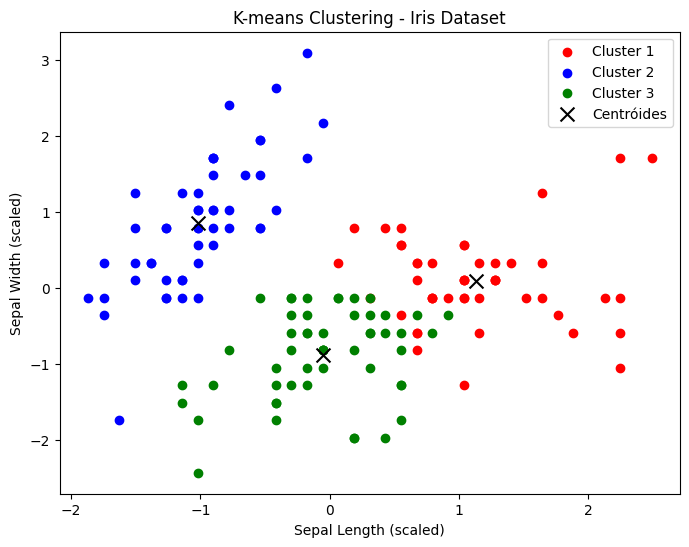

In [27]:
# Obtendo os rótulos de cluster atribuídos a cada ponto
labels = kmeans.labels_

# Plotando os pontos dos dados em três cores diferentes, representando cada cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[labels == 0][:, 0], X_scaled[labels == 0][:, 1], color='red', label='Cluster 1')
plt.scatter(X_scaled[labels == 1][:, 0], X_scaled[labels == 1][:, 1], color='blue', label='Cluster 2')
plt.scatter(X_scaled[labels == 2][:, 0], X_scaled[labels == 2][:, 1], color='green', label='Cluster 3')

# Plotando os centróides dos clusters em preto
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centróides')

plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title('K-means Clustering - Iris Dataset')
plt.legend()
plt.show()


Neste código, usamos a biblioteca matplotlib para criar o gráfico de dispersão com os pontos de dados coloridos de acordo com os clusters atribuídos pelo K-means. Os centróides dos clusters são plotados como "x" em preto.

## K-means Clustering com Conjunto de Dados "Wholesale Customers Data"

In [33]:
#Etapa 1: Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [34]:
#Etapa 2: Carregando e explorando o conjunto de dados
# Carregando o conjunto de dados "Wine"
data = load_wine()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)

# Visualizando as primeiras linhas do DataFrame
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [35]:
# Verificando informações sobre o conjunto de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [36]:
# Descrição estatística do conjunto de dados
print(df.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [37]:
#Etapa 3: Pré-processamento dos dados
# Escalando os dados para ter média 0 e variância 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [38]:
#Etapa 4: Aplicando o K-means - Neste exemplo, vamos definir "k" como 5, ou seja, vamos agrupar os clientes em 5 clusters.
# Criando o objeto do modelo K-means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Aplicando o K-means aos dados
kmeans.fit(X_scaled)

# Obtendo os centróides dos clusters
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


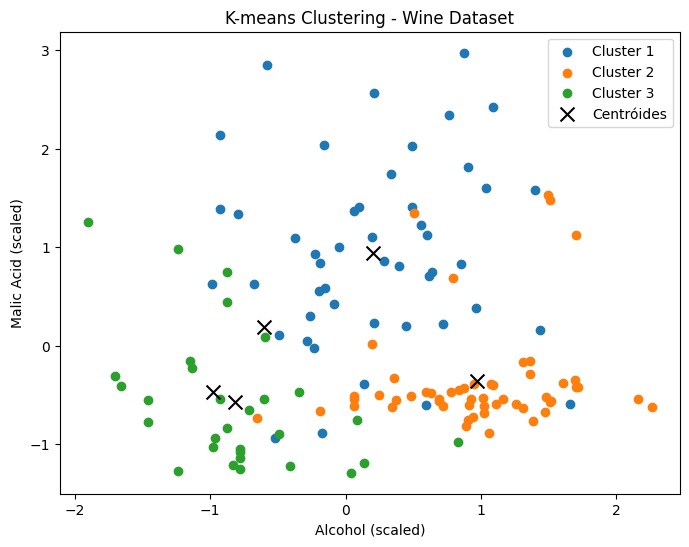

In [39]:
#Etapa 5: Visualizando os resultados
# Obtendo os rótulos de cluster atribuídos a cada ponto
labels = kmeans.labels_

# Plotando os pontos dos dados em três cores diferentes, representando cada cluster
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_scaled[labels == i][:, 0], X_scaled[labels == i][:, 1], label=f'Cluster {i + 1}')

# Plotando os centróides dos clusters em preto
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centróides')

plt.xlabel('Alcohol (scaled)')
plt.ylabel('Malic Acid (scaled)')
plt.title('K-means Clustering - Wine Dataset')
plt.legend()
plt.show()


Neste exemplo, estamos usando as características "Alcohol" e "Malic Acid" para facilitar a visualização em um gráfico bidimensional. Você pode explorar os agrupamentos usando outras características em um conjunto de dados real.

O K-means é uma poderosa ferramenta para agrupamento de dados e pode ser aplicado em várias aplicações, como segmentação de clientes, análise de mercado, detecção de anomalias, entre outros.